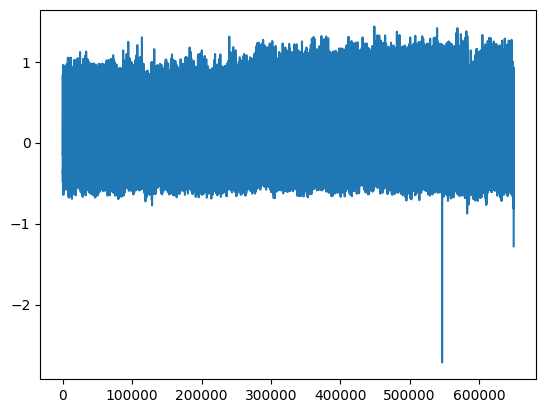

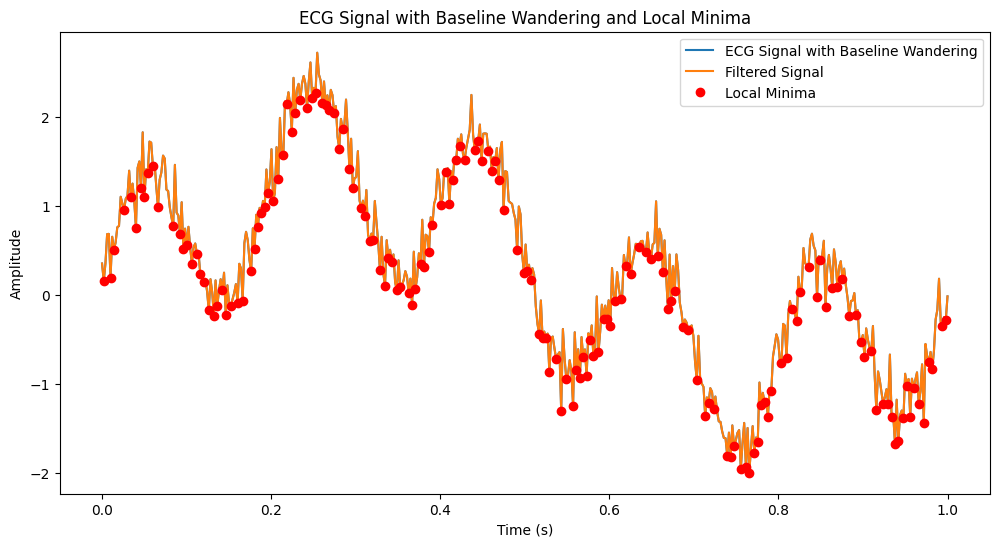

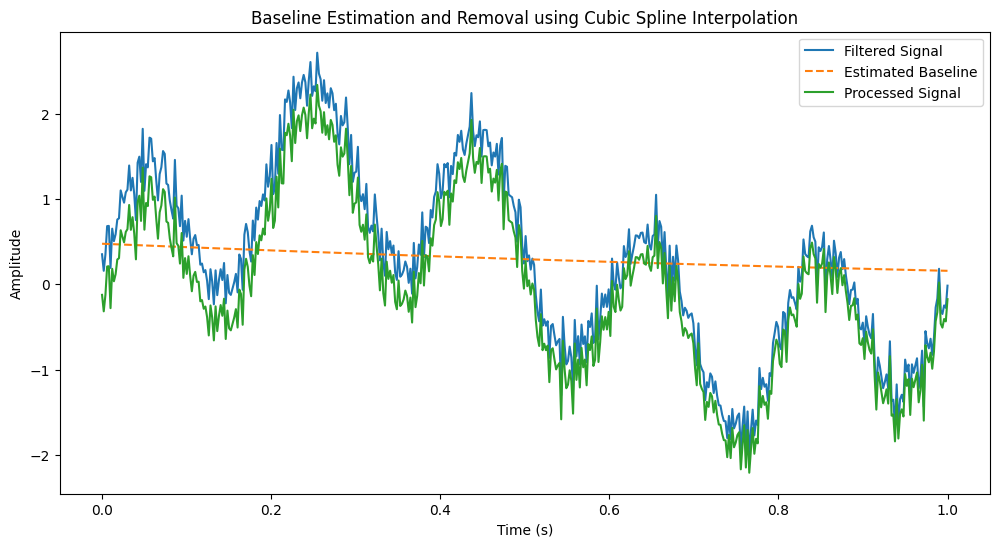

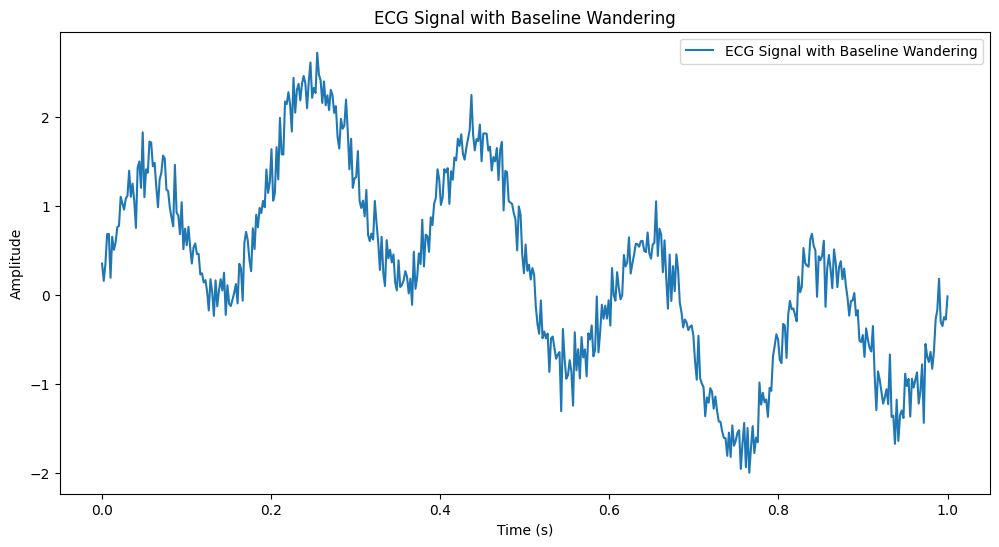

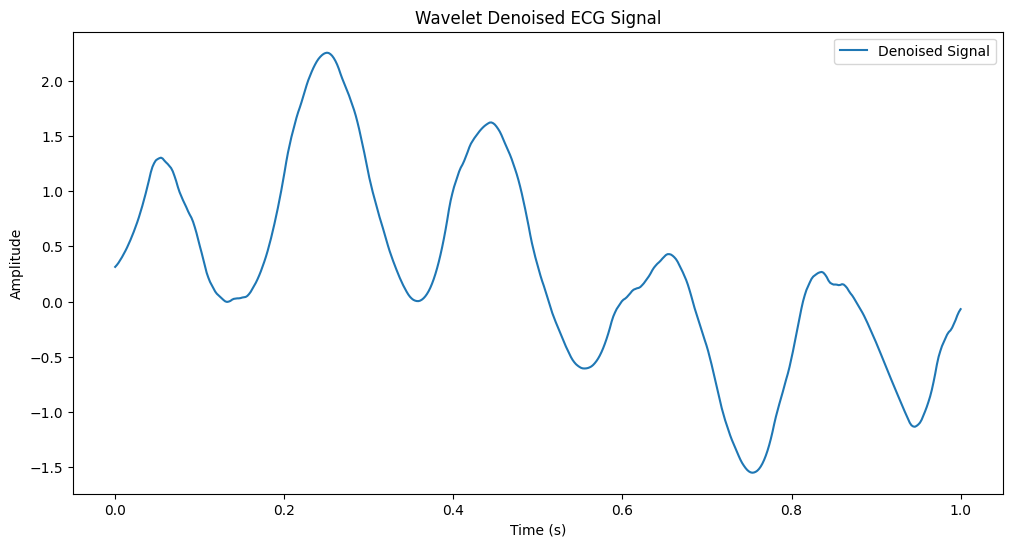

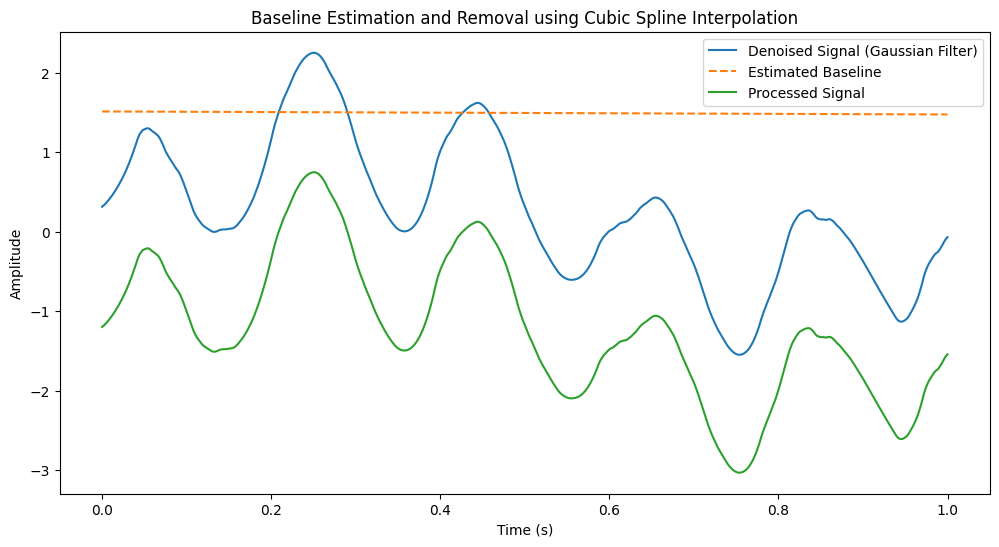

In [1]:
import zipfile
import os

zip_file_path = "C:/Desktop/Moinuddin bhuiyan/mit-bih-arrhythmia-database-1.0.0.zip"
extract_dir = "C:/Desktop/Moinuddin bhuiyan/mit-bih-arrhythmia-database-1.0.0"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


import wfdb
import os
import numpy as np

# Directory containing the extracted files
data_dir = "C:/Desktop/Moinuddin bhuiyan/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0"

# List all the record files in the directory
record_files = [f for f in os.listdir(data_dir) if f.endswith('.dat')]

record_files[10]

# Function to load a single record
def load_record(record_name):
    record_path = os.path.join(data_dir, record_name)
    # Load the record using wfdb
    record = wfdb.rdrecord(record_path)
    annotation = wfdb.rdann(record_path, 'atr')
    return record, annotation

# Example: Load the first record
record_name = record_files[0].replace('.dat', '')
record, annotation = load_record(record_name)

# Access signal data
ecg_signals = record.p_signal

# Access annotations (e.g., beat locations and types)
annotation_samples = annotation.sample
annotation_symbols = annotation.symbol

record

import pandas as pd

patient_100_file=pd.read_csv("C:/Desktop/Moinuddin bhuiyan/mit-ecg/100.csv")
import pandas as pd

import matplotlib.pyplot as plt
plt.plot(patient_100_file["MLII"])

import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

# Low-pass filter
def lowpass_filter(signal, cutoff=35, fs=360, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, signal)
    return y

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) / c) ** 2)

# WBSP: Waveform-based Signal Processing
def wbsp(ecg_signal):
    # Step 1: Low-pass filtering
    filtered_signal = lowpass_filter(ecg_signal)
    
    # Step 2: Local minima search
    local_minima, _ = find_peaks(-filtered_signal)
    
    # Step 3: Remove baseline wandering
    cs = CubicSpline(local_minima, filtered_signal[local_minima])
    baseline = cs(np.arange(len(filtered_signal)))
    processed_signal = filtered_signal - baseline
    
    # Step 4: Curve fitting with Gaussian
    features = []
    for i in range(len(local_minima) - 1):
        segment = processed_signal[local_minima[i]:local_minima[i + 1]]
        if len(segment) > 3:
            x_data = np.arange(len(segment))
            popt, _ = curve_fit(gaussian, x_data, segment, p0=[1, np.mean(x_data), 1])
            features.append(popt)
    return features

import numpy as np
import pywt
from scipy.signal import find_peaks

# Wavelet transform for denoising
def wavelet_denoise(signal, wavelet='db4', level=4):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs = [pywt.threshold(c, value=uthresh, mode='soft') for c in coeffs]
    denoised_signal = pywt.waverec(coeffs, wavelet)
    return denoised_signal

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Example function to train machine learning classifiers
def train_ml_classifiers(features, labels):
    classifiers = {
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier()
    }
    
    for name, clf in classifiers.items():
        clf.fit(features, labels)
        accuracy = clf.score(features, labels)
        print(f'{name} accuracy: {accuracy:.2f}')

np.random.seed(0)
t = np.linspace(0, 1, 500)
ecg_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 1 * t) + 0.2 * np.random.randn(t.size)
baseline_wandering = 0.5 * np.sin(2 * np.pi * 0.5 * t)
ecg_signal_with_baseline = ecg_signal + baseline_wandering

# Apply a low-pass filter (for illustration purposes, not implemented here)
filtered_signal = ecg_signal_with_baseline

# Find local minima in the filtered signal
local_minima, _ = find_peaks(-filtered_signal)

# Plot the original signal, signal with baseline wandering, and local minima
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal_with_baseline, label='ECG Signal with Baseline Wandering')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.plot(t[local_minima], filtered_signal[local_minima], 'ro', label='Local Minima')
plt.legend()
plt.title('ECG Signal with Baseline Wandering and Local Minima')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


# Use cubic spline interpolation to estimate the baseline
cs = CubicSpline(local_minima, filtered_signal[local_minima])
baseline_estimate = cs(t)

# Subtract the estimated baseline from the filtered signal
processed_signal = filtered_signal - baseline_estimate

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.plot(t, baseline_estimate, label='Estimated Baseline', linestyle='--')
plt.plot(t, processed_signal, label='Processed Signal')
plt.legend()
plt.title('Baseline Estimation and Removal using Cubic Spline Interpolation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


# Generate a synthetic ECG signal
np.random.seed(0)
t = np.linspace(0, 1, 500)
ecg_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 1 * t) + 0.2 * np.random.randn(t.size)
baseline_wandering = 0.5 * np.sin(2 * np.pi * 0.5 * t)
ecg_signal_with_baseline = ecg_signal + baseline_wandering

# Plot the original signal with baseline wandering
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal_with_baseline, label='ECG Signal with Baseline Wandering')
plt.legend()
plt.title('ECG Signal with Baseline Wandering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


def wavelet_denoise(signal, wavelet='db4', level=4):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs = [pywt.threshold(c, value=uthresh, mode='soft') for c in coeffs]
    denoised_signal = pywt.waverec(coeffs, wavelet)
    return denoised_signal

denoised_signal = wavelet_denoise(ecg_signal_with_baseline)

# Plot the denoised signal
plt.figure(figsize=(12, 6))
plt.plot(t, denoised_signal, label='Denoised Signal')
plt.legend()
plt.title('Wavelet Denoised ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Find local minima in the denoised signal
local_minima, _ = find_peaks(-denoised_signal)

# Use cubic spline interpolation to estimate the baseline
cs = CubicSpline(local_minima, denoised_signal[local_minima])
baseline_estimate = cs(t)

# Subtract the estimated baseline from the denoised signal
processed_signal = denoised_signal - baseline_estimate

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, denoised_signal, label='Denoised Signal (Gaussian Filter)')
plt.plot(t, baseline_estimate, label='Estimated Baseline', linestyle='--')
plt.plot(t, processed_signal, label='Processed Signal')
plt.legend()
plt.title('Baseline Estimation and Removal using Cubic Spline Interpolation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()




In [3]:
import wfdb
import numpy as np
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function to extract features (example: RR intervals)
def extract_rr_intervals(annotation_samples):
    rr_intervals = np.diff(annotation_samples)
    return rr_intervals

# Function to prepare the dataset
def prepare_dataset(record_files, data_dir):
    features = []
    labels = []
    
    for record_name in record_files:
        record_path = os.path.join(data_dir, record_name.replace('.dat', ''))
        record = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')
        
        # Extract features (e.g., RR intervals)
        rr_intervals = extract_rr_intervals(annotation.sample)
        
        # Use basic statistics of RR intervals as features
        feature_vector = [
            np.mean(rr_intervals),
            np.std(rr_intervals),
            np.min(rr_intervals),
            np.max(rr_intervals)
        ]
        
        features.append(feature_vector)
        
        # Label as '1' if arrhythmia is present, '0' if normal
        if 'N' in annotation.symbol:  # 'N' for normal beat
            labels.append(0)
        else:
            labels.append(1)
    
    return np.array(features), np.array(labels)

# Load and prepare the data
record_files = [f for f in os.listdir(data_dir) if f.endswith('.dat')]
features, labels = prepare_dataset(record_files, data_dir)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.90
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.00      0.00      0.00         0

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10



C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.00      0.00      0.00         0

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10



C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


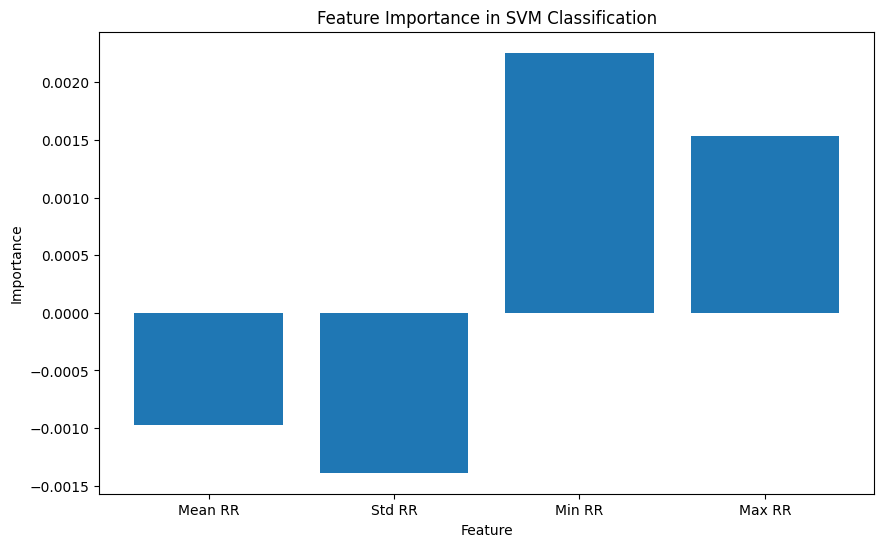

In [3]:
import wfdb
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to extract RR intervals as features
def extract_rr_intervals(annotation_samples):
    rr_intervals = np.diff(annotation_samples)
    return rr_intervals

# Function to prepare the dataset
def prepare_dataset(record_files, data_dir):
    features = []
    labels = []
    
    for record_name in record_files:
        record_path = os.path.join(data_dir, record_name.replace('.dat', ''))
        record = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')
        
        # Extract features (e.g., RR intervals)
        rr_intervals = extract_rr_intervals(annotation.sample)
        
        # Use basic statistics of RR intervals as features
        feature_vector = [
            np.mean(rr_intervals),
            np.std(rr_intervals),
            np.min(rr_intervals),
            np.max(rr_intervals)
        ]
        
        features.append(feature_vector)
        
        # Label as '1' if arrhythmia is present, '0' if normal
        if 'N' in annotation.symbol:  # 'N' for normal beat
            labels.append(0)
        else:
            labels.append(1)
    
    return np.array(features), np.array(labels)

# Load and prepare the data
data_dir = "C:/Desktop/Moinuddin bhuiyan/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0"
record_files = [f for f in os.listdir(data_dir) if f.endswith('.dat')]
features, labels = prepare_dataset(record_files, data_dir)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Visualize the feature importance (for linear SVMs only)
if svm_clf.kernel == 'linear':
    importance = svm_clf.coef_[0]
    feature_names = ['Mean RR', 'Std RR', 'Min RR', 'Max RR']
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, importance)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance in SVM Classification')
    plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Prepare the dataset
features, labels = prepare_dataset(record_files, data_dir)

# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Define the SVM model with hyperparameter tuning
svm_clf = SVC(kernel='rbf')  # Using RBF kernel as an example

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(features, labels)

# Get the best estimator
best_svm = grid_search.best_estimator_

# Evaluate using cross-validation
cv_scores = cross_val_score(best_svm, features, labels, cv=10)
print(f'Cross-validated Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

# Train and predict on the original train/test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

# Final evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Final Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Cross-validated Accuracy: 0.84 ± 0.08
Final Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



C:\Users\sirih\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=3) 
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.90
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.00      0.00      0.00         0

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10



C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.70
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.00      0.00      0.00         0

    accuracy                           0.70        10
   macro avg       0.50      0.35      0.41        10
weighted avg       1.00      0.70      0.82        10



C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sirih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
